# Prepea

In [1]:
%matplotlib inline 

import sys

sys.path.append("../")

dataset_root = "../dataset"
version = 0
checkpoint_path = "../lightning_logs/version_{}/checkpoints/epoch=19-step=1439.ckpt".format(version)

In [20]:
from cloudnet import CCSNDataSet, CloudNet, Backbone
from utils import show_multilabel_confusion_matrix

# Dataset info

In [3]:
# load
ds = CCSNDataSet(dataset_root)

In [4]:
# Describe dataset
tmp = ""
for idx, l in enumerate(ds.labels):
    tmp += "{}[{}]; ".format(l, idx)
print("Label list ({}):".format(len(ds.labels)))
print(tmp)

Label list (11):
Ac[0]; As[1]; Cb[2]; Cc[3]; Ci[4]; Cs[5]; Ct[6]; Cu[7]; Ns[8]; Sc[9]; St[10]; 


Label: 2 Label name: Cb


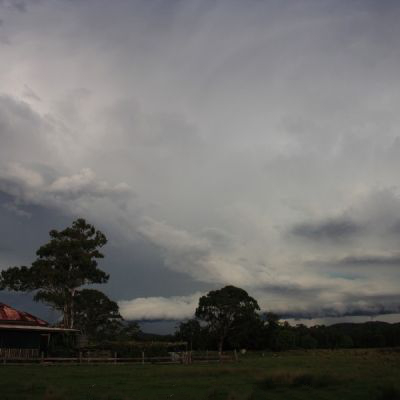

In [5]:
# Example image
img, label = ds[1]
print("Label:", int(label), "Label name:", ds.labels[label])
img

In [6]:
#
total = 0
label_count = {i: {"name": x, "count": 0} for i, x in enumerate(ds.labels)}
for _, l in ds:
    label_count[int(l)]["count"] += 1
    total += 1

for idx, item in label_count.items():
    print("Label: {}({}) = {} ({:.02f})".format(item["name"], idx, item["count"], item["count"]/total * 100))
print("-------------")
print("Total:", total)

Label: Ac(0) = 221 (8.69)
Label: As(1) = 188 (7.39)
Label: Cb(2) = 242 (9.52)
Label: Cc(3) = 268 (10.54)
Label: Ci(4) = 139 (5.47)
Label: Cs(5) = 287 (11.29)
Label: Ct(6) = 200 (7.86)
Label: Cu(7) = 182 (7.16)
Label: Ns(8) = 274 (10.77)
Label: Sc(9) = 340 (13.37)
Label: St(10) = 202 (7.94)
-------------
Total: 2543


# Inference

In [7]:
# Load model
model = CloudNet.load_from_checkpoint(checkpoint_path)

In [8]:
model.infer(ds[0][0])

2